<a href="https://colab.research.google.com/github/viethoang298/AI-MachineLearning/blob/main/SVMKernels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

_polyDegree = 2
_gaussSigma = 1


def myPolynomialKernel(X1, X2):
    '''
        Arguments:
            X1 - an n1-by-d numpy array of instances
            X2 - an n2-by-d numpy array of instances
        Returns:
            An n1-by-n2 numpy array representing the Kernel (Gram) matrix
    '''
    # Compute the polynomial kernel matrix
    return (np.dot(X1, X2.T) + 1) ** _polyDegree


def myGaussianKernel(X1, X2):
    '''
        Arguments:
            X1 - an n1-by-d numpy array of instances
            X2 - an n2-by-d numpy array of instances
        Returns:
            An n1-by-n2 numpy array representing the Kernel (Gram) matrix
    '''
    # Compute the Gaussian kernel matrix
    pairwise_sq_dists = np.sum(X1**2, axis=1, keepdims=True) + np.sum(X2**2, axis=1) - 2 * np.dot(X1, X2.T)
    return np.exp(-pairwise_sq_dists / (2 * _gaussSigma**2))


def myCosineSimilarityKernel(X1, X2):
    '''
        Arguments:
            X1 - an n1-by-d numpy array of instances
            X2 - an n2-by-d numpy array of instances
        Returns:
            An n1-by-n2 numpy array representing the Kernel (Gram) matrix
    '''
    # Compute the cosine similarity kernel matrix (CIS 519 ONLY)
    norm_X1 = np.linalg.norm(X1, axis=1, keepdims=True)
    norm_X2 = np.linalg.norm(X2, axis=1, keepdims=True)
    return np.dot(X1, X2.T) / (norm_X1 * norm_X2)


test


Test SVM with custom polynomial kernels

Author: Eric Eaton, 2014

Adapted from scikit_learn documentation.


Training the SVMs...

Testing the SVMs...


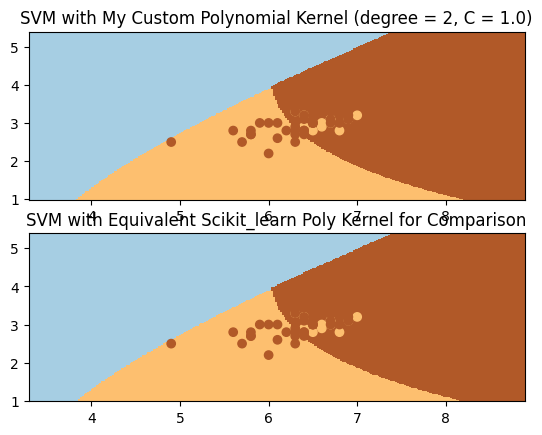

In [3]:
"""
=======================================
Test SVM with custom polynomial kernels
=======================================

Author: Eric Eaton, 2014

Adapted from scikit_learn documentation.

"""
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features
Y = iris.target

print ("Training the SVMs...")

C = 1.0  # value of C for the SVMs

# create an instance of SVM with the custom kernel and train it
myModel = svm.SVC(C = C, kernel=myPolynomialKernel)
myModel.fit(X, Y)

# create an instance of SVM with build in poly kernel and train it
model = svm.SVC(C = C, kernel='poly', degree=_polyDegree, coef0=1, gamma=1)
model.fit(X, Y)

print ("")
print ("Testing the SVMs...")

h = .02  # step size in the mesh

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


# get predictions for both my model and true model
myPredictions = myModel.predict(np.c_[xx.ravel(), yy.ravel()])
myPredictions = myPredictions.reshape(xx.shape)

predictions = model.predict(np.c_[xx.ravel(), yy.ravel()])
predictions = predictions.reshape(xx.shape)

# plot my results
plt.subplot(2, 1, 1)
plt.pcolormesh(xx, yy, myPredictions, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired) # Plot the training points
plt.title("SVM with My Custom Polynomial Kernel (degree = "+str(_polyDegree) + ", C = "+str(C)+")")
plt.axis('tight')

# plot built-in results
plt.subplot(2, 1, 2)
plt.pcolormesh(xx, yy, predictions, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired) # Plot the training points
plt.title('SVM with Equivalent Scikit_learn Poly Kernel for Comparison')
plt.axis('tight')

plt.show()




Test SVM with custom Gaussian kernels

Author: Eric Eaton, 2014

Adapted from scikit_learn documentation.


Training the SVMs...

Testing the SVMs...


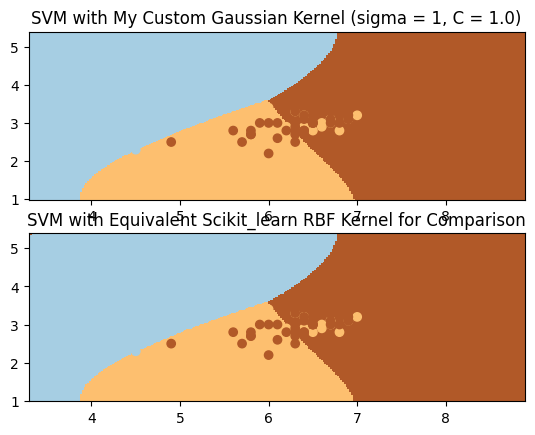

In [ ]:
"""
=====================================
Test SVM with custom Gaussian kernels
=====================================

Author: Eric Eaton, 2014

Adapted from scikit_learn documentation.

"""
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features
Y = iris.target

print ("Training the SVMs...")

C = 1.0  # value of C for the SVMs

# create an instance of SVM with the custom kernel and train it
myModel = svm.SVC(C = C, kernel=myGaussianKernel)
myModel.fit(X, Y)

# create an instance of SVM with build in RBF kernel and train it
equivalentGamma = 1.0 / (2 * _gaussSigma ** 2)
model = svm.SVC(C = C, kernel='rbf', gamma=equivalentGamma)
model.fit(X, Y)

print ("")
print ("Testing the SVMs...")

h = .02  # step size in the mesh

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


# get predictions for both my model and true model
myPredictions = myModel.predict(np.c_[xx.ravel(), yy.ravel()])
myPredictions = myPredictions.reshape(xx.shape)

predictions = model.predict(np.c_[xx.ravel(), yy.ravel()])
predictions = predictions.reshape(xx.shape)

# plot my results
plt.subplot(2, 1, 1)
plt.pcolormesh(xx, yy, myPredictions, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired) # Plot the training points
plt.title("SVM with My Custom Gaussian Kernel (sigma = "+str(_gaussSigma) + ", C = "+str(C)+")")
plt.axis('tight')

# plot built-in results
plt.subplot(2, 1, 2)
plt.pcolormesh(xx, yy, predictions, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired) # Plot the training points
plt.title('SVM with Equivalent Scikit_learn RBF Kernel for Comparison')
plt.axis('tight')

plt.show()

